In [39]:
import sys
from pathlib import Path

ROOT_DIR_PATH = str(Path().absolute().parent)
sys.path.append(ROOT_DIR_PATH)
print(f"Adding to PATH: {ROOT_DIR_PATH}")

Adding to PATH: /Users/vyro/Drive/DWDM_Project


# Symptom Based Disease Predction - DWDM Project

In [40]:
from dataset import DiseaseDataset
from models import NaiveBayesModel, NeuralNetworkModel, DecisionTree, RandomForestModel, SVMClassifierModel
from utils import calulate_metrics, display_confusion_matrix

In [41]:
from sklearn.model_selection import train_test_split

## Preprocessing Parameters

Vary values for metric comparison

In [42]:
# -- PARAMETERS -- #
APPLY_PCA = True           # -- IF PCA is to be applied 
NUM_PCA_COMPONENTS = 40     # -- 40 is the Optimal PCA Componenets found using Variance Ratio

### Common function for complete processing

In [43]:
# -- do_attribute_reduction=False to turn off PCA
data = DiseaseDataset("/Users/vyro/Drive/DWDM_Project/data/diseasedata.csv", do_attribute_reduction=APPLY_PCA, pca_components=NUM_PCA_COMPONENTS)
X, y = data.get_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

def process(model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    calulate_metrics(y_test, predictions)
    display_confusion_matrix(y_test, predictions, classes=data.get_unqiue_classes())

## Choose between various models to measuere classification metrics

USING SUPPORT VECTOR CLASSIFIER WITH RBF FUNCTION
ACCURACY SCORE: 1.000
F1 Score: 1.000
R2 Score: 1.000


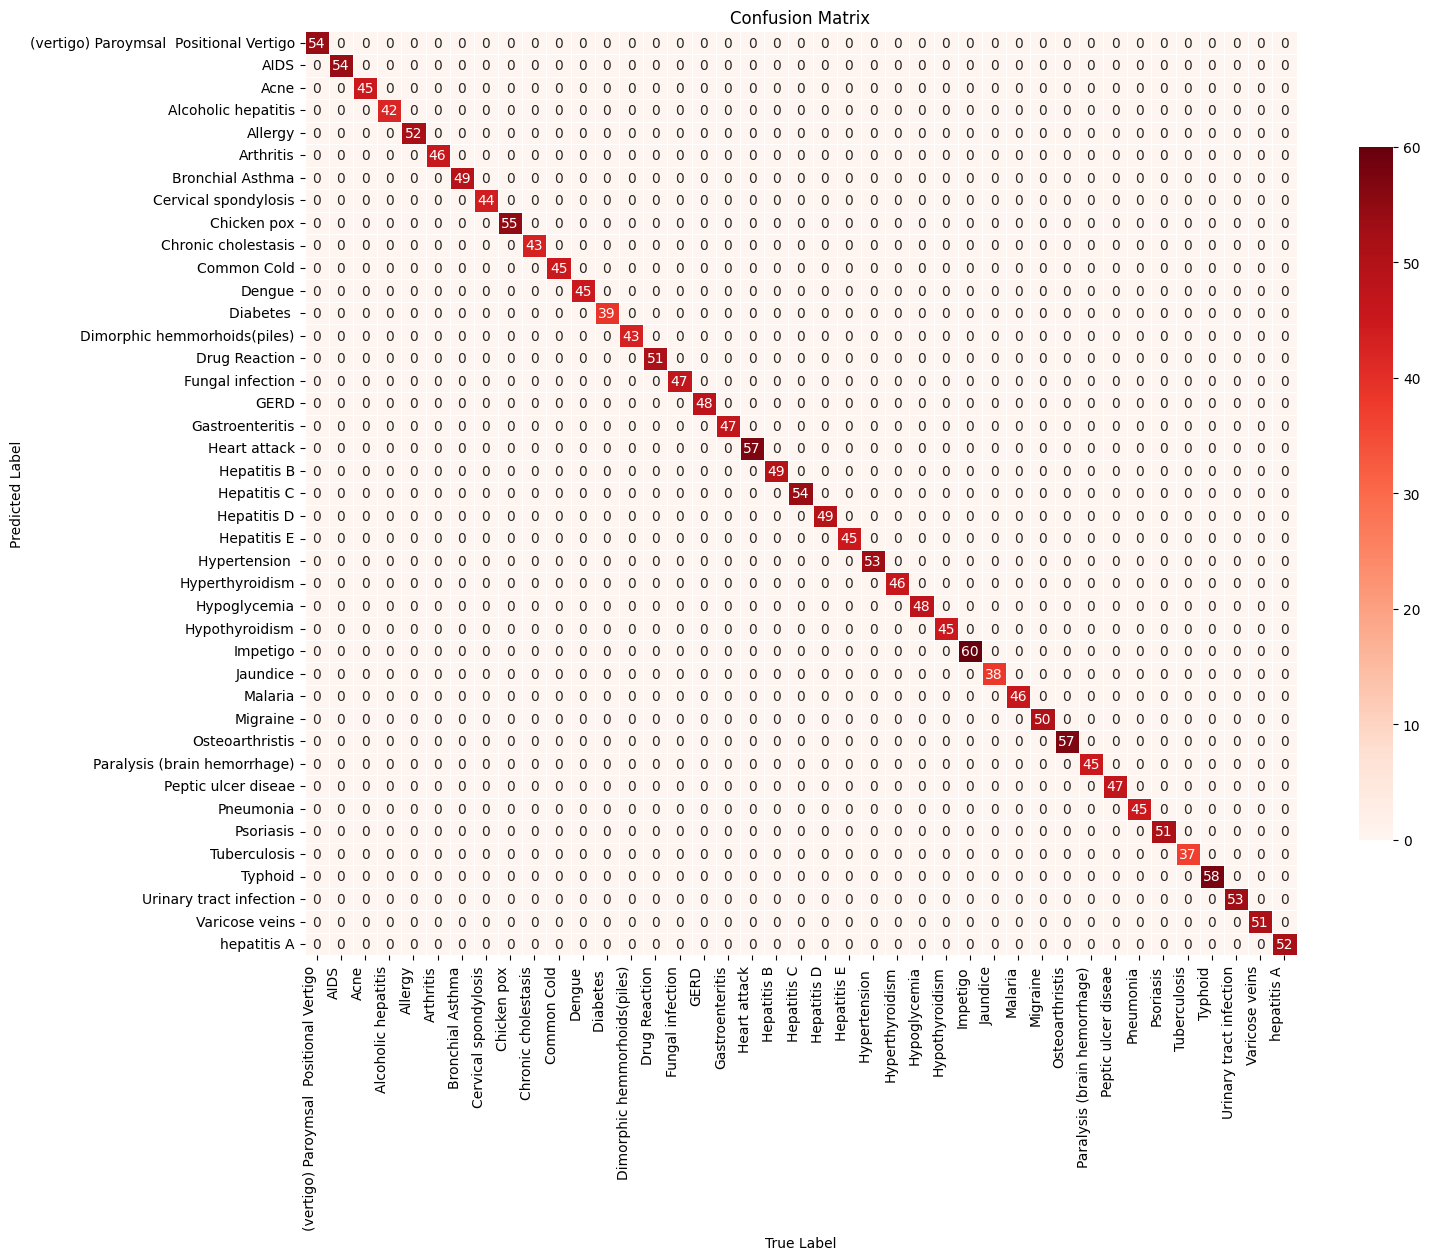

In [44]:
# model = NaiveBayesModel()
# model = NeuralNetworkModel(num_features=data.get_num_attributes(), num_classes=data.get_num_classes())
model = SVMClassifierModel()
# model = DecisionTree()
# model = RandomForestModel()
process(model)